In [48]:
# pip install nltk
# pip install lazypredict
# pip install seaborn
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('graphviz')
import random
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os
import re
import string
from nltk.metrics import ConfusionMatrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams
import sys
from nltk import ngrams
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import re
import string
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.util import bigrams
from nltk import FreqDist
import statistics
import numpy as np 
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
import pandas as pd
from lazypredict.Supervised import LazyClassifier
import os
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
import nltk
from nltk.tokenize import sent_tokenize, RegexpTokenizer

[nltk_data] Downloading package punkt to /home/abby/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/abby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading graphviz: Package 'graphviz' not found in
[nltk_data]     index


In [3]:
# Define the paths to the two directories
original_dir = r"./DataSet2/benchmark_set/human-written"
generated_dir = r"./DataSet2/benchmark_set/ai-generated"

# Get the files for the original
original_file_ids = [file_id for file_id in os.listdir(original_dir) if file_id.endswith(".txt")]
file_original = []
for file_id in original_file_ids:
    file_path = os.path.join(original_dir, file_id)
    #print(f"Reading original file: {file_path}")  # Print file path for debugging
    with open(file_path, 'r', encoding='utf-8') as file:
        file_original.append((file.read(), "org"))  # Tuple with text and class "org"

# Get the files for the generated
generated_file_ids = [file_id for file_id in os.listdir(generated_dir) if file_id.endswith(".txt")]
file_generated = []
for file_id in generated_file_ids:
    file_path = os.path.join(generated_dir, file_id)
    #print(f"Reading generated file: {file_path}")  # Print file path for debugging
    with open(file_path, 'r', encoding='utf-8') as file:
        file_generated.append((file.read(), "gen"))  # Tuple with text and class "gen"

# Check if there are overlapping file IDs between the two directories
if set(original_file_ids).intersection(set(generated_file_ids)):
    print("Warning: There are overlapping file IDs between original and generated data.")
else:
    print("No overlapping file IDs between original and generated data.")

# Merge the files into one string
merged_original = '{*%*}'.join([text for text, _ in file_original])
merged_generated = '{*%*}'.join([text for text, _ in file_generated])

# Combine the data from both classes
documents = file_original + file_generated
print(len(documents))
# Get as words
all_words = []
short_org_words = word_tokenize(merged_original)
short_gen_words = word_tokenize(merged_generated)

for w in short_org_words:
    all_words.append(w.lower())
for w in short_gen_words:
    all_words.append(w.lower())

print("Length of Human Data:", len(short_org_words)) # Number of words
print("Length of Generated Data:", len(short_gen_words)) # Number of words
print("All data size: ", len(all_words))    # Todal number of words
print("=====")
def clean(text, punF, numF, stopF):
    # remove numbers
    if numF == 1:
        text = re.sub(r'\d+', '', text)
    # remove punctuations
    if punF == 1:
        text = "".join([char for char in text if char not in string.punctuation]) 
    # remove stop words
    if stopF == 1:
        stop_words = set(stopwords.words('english'))
        text = [w for w in word_tokenize(text) if w.lower() not in stop_words]
        text = ' '.join(text)  # Join the list of words into a single string
    return text

# output = [clean(word,1,1,1) for word in all_words]
# print("Cleaned data size: ",len((all_words))) # Number of cleaned words



2001
Length of Human Data: 669386
Length of Generated Data: 404577
All data size:  1073963
=====


In [49]:
def find_features_stats(document, control):
        # Set Up
        sentences = sent_tokenize(document)
        tokenizer = RegexpTokenizer(r'\w+')
        sentence_lengths = [len(tokenizer.tokenize(sentence)) for sentence in sentences]
        #sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
        paragraphs = document.split('\n\n') 
        features = {}
        #print(sentence_lengths)

        # sentences per paragraph
        if control[0] == 1:
            sent_per_paragraph = [len(sent_tokenize(paragraph)) for paragraph in paragraphs]
            mean_sent_per_paragraph = np.mean(sent_per_paragraph)
            features['Sentences per paragraph'] = mean_sent_per_paragraph

        # words per paragraph
        if control[1] == 1:
            words_per_paragraph = [len(word_tokenize(paragraph)) for paragraph in paragraphs]
            mean_words_per_paragraph = np.mean(words_per_paragraph)
            features['Words per paragraph'] = mean_words_per_paragraph

        # Number of occurrences of ')'
        if control[2] == 1:
            var = document.count(')')
            features['Number of occurrences of )'] = var

        # Number of occurrences of '-'
        if control[3] == 1:
            var = document.count('-')
            features['Number of occurrences of -'] = var

        # Number of occurrences of ';'
        if control[4] == 1:
            var = document.count(';')
            features['Number of occurrences of ;'] = var
        
        # Number of occurrences of '?'
        if control[5] == 1:
            var = document.count('?')
            features['Number of occurrences of ?'] = var
            
        # Number of occurrences of '''
        if control[6] == 1:
            var = document.count('\'')
            features['Number of occurrences of \''] = var

        # Sentence STD
        if control[7] == 1:
            std_dev = np.std(sentence_lengths) # Sample STD
            features['Sentence STD'] = std_dev

        # Length difference for consecutive sentences
        if control[8] == 1:
            length_diff = [sentence_lengths[i] - sentence_lengths[i - 1] for i in range(1, len(sentence_lengths))]
            # Add mean length difference as a feature if there is a valid denominator
            if len(length_diff) > 0:
                mean_length_diff = np.mean(length_diff)
                features['Length difference for consecutive sentences'] = mean_length_diff
            else:
                # Handle the case when there is no valid denominator (e.g., only one sentence)
                features['Length difference for consecutive sentences'] = 0.0  # Set a default value or choose an appropriate handling
        # Sentence with <11 words
        if control[9] == 1:
            # Count sentences with <11 words
            short_sentences = [sentence for sentence in sentence_lengths if sentence < 11]
            num_short_sentences = len(short_sentences)
            # Add the count as a feature
            features['Sentence with <11 words'] = num_short_sentences

        # Sentence with >34 words
        if control[10] == 1:
            # Count sentences with <11 words
            short_sentences = [sentence for sentence in sentence_lengths if sentence > 34]
            num_short_sentences = len(short_sentences)
            # Add the count as a feature
            features['Sentence with >34 words'] = num_short_sentences

        # Number of occurrences of 'although'
        if control[11] == 1:
            var = document.count('although')
            features['Number of occurrences of although'] = var

        # Number of occurrences of 'However'
        if control[12] == 1:
            var = document.count('However')
            features['Number of occurrences of However'] = var

        # Number of occurrences of 'but'
        if control[13] == 1:
            var = document.count('but')
            features['Number of occurrences of but'] = var

        # Number of occurrences of 'because'
        if control[14] == 1:
            var = document.count('because')
            features['Number of occurrences of because'] = var

        # Number of occurrences of 'this'
        if control[15] == 1:
            var = document.count('this')
            features['Number of occurrences of this'] = var

        # Number of occurrences of ‘others’ or ‘researchers’
        if control[16] == 1:
            var = document.lower().count('others') + document.lower().count('researchers')
            features['Number of occurrences of others or researchers'] = var
        
        # Count of numbers in the document
        if control[17] == 1:
            numbers = re.findall(r'\b\d+\b', document)  # Using regex to find all numbers
            count_numbers = len(numbers)
            features['Count of numbers in the document'] = count_numbers

        # Contains 2 times more capitals than periods
        if control[18] == 1:
            count_capitals = sum(1 for char in document if char.isupper())
            count_periods = document.count('.')
            
            if count_periods > 0 and count_capitals >= 2 * count_periods:
                features['Contains 2 times more capitals than periods'] = 1
            else:
                features['Contains 2 times more capitals than periods'] = 0

        # Number of occurrences of 'et'
        if control[19] == 1:
            var = document.count('et')
            features['Number of occurrences of et'] = var

        # Sentence Mean
        if control[20] == 1:
            mean_length = np.mean(sentence_lengths)
            features['Sentence Mean'] = mean_length
        
        
        return features

In [5]:
# Split the merged strings into individual documents
org_documents = merged_original.split('{*%*}')
gen_documents = merged_generated.split('{*%*}')
print(f"Number of objects in org_documents: {len(org_documents)}")
print(f"Number of objects in gen_documents: {len(gen_documents)}")

control = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
# Calculate features for both original and generated documents
org_features = [find_features_stats(doc, control) for doc in org_documents]
gen_features = [find_features_stats(doc, control) for doc in gen_documents]

Number of objects in org_documents: 1001
Number of objects in gen_documents: 1000


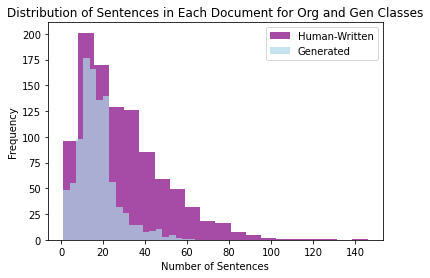

Gen: mean: 17.35, STD: 9.441477638590264
Org: mean: 29.027972027972027, STD: 20.003127047827427


In [6]:
# Split the merged strings into individual documents
org_documents = merged_original.split('{*%*}')
gen_documents = merged_generated.split('{*%*}')

# Calculate the number of sentences in each document
org_sentences_per_doc = [len(sent_tokenize(doc)) for doc in org_documents]
gen_sentences_per_doc = [len(sent_tokenize(doc)) for doc in gen_documents]

# Set the number of bins
num_bins = 20  # You can adjust this value as needed

# Create a bar chart for both classes with controlled bins
plt.hist(org_sentences_per_doc, bins=num_bins, color='purple', alpha=0.7, label='Human-Written')
plt.hist(gen_sentences_per_doc, bins=num_bins, color='lightblue', alpha=0.7, label='Generated')

plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Distribution of Sentences in Each Document for Org and Gen Classes')
plt.legend()
plt.show()

print(f"Gen: mean: {np.mean(gen_sentences_per_doc)}, STD: {np.std(gen_sentences_per_doc)}")
print(f"Org: mean: {np.mean(org_sentences_per_doc)}, STD: {np.std(org_sentences_per_doc)}")

---Sentences per paragraph--- 0
Gen: mean: 6.792, STD: 9.0, (Min, Max): (0.993, 57.0)
Org: mean: 4.505, STD: 6.987, (Min, Max): (0.588, 70.0)


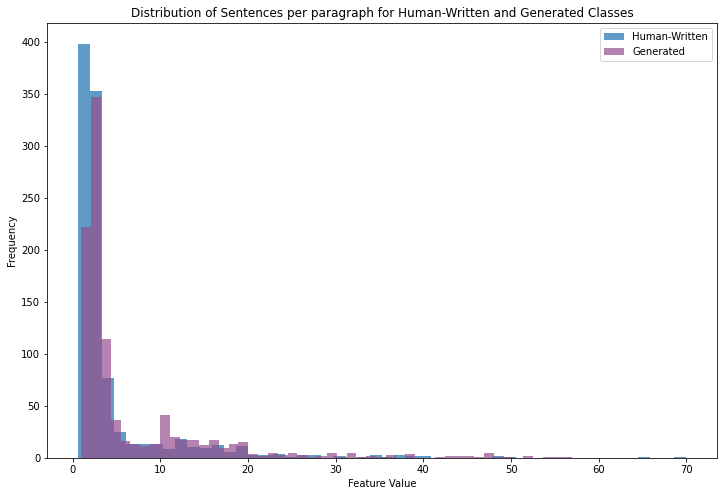

---Words per paragraph--- 1
Gen: mean: 152.86, STD: 191.097, (Min, Max): (1.374, 1023.0)
Org: mean: 113.604, STD: 210.68, (Min, Max): (3.941, 1566.0)


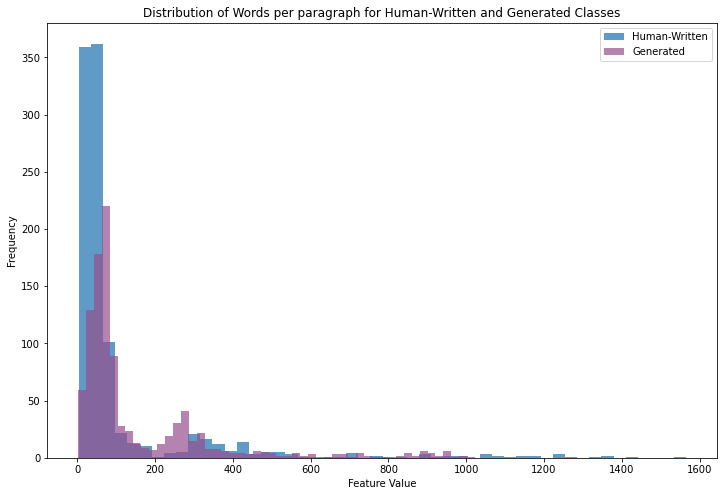

---Number of occurrences of )--- 2
Gen: mean: 1.133, STD: 3.28, (Min, Max): (0, 53)
Org: mean: 2.834, STD: 6.17, (Min, Max): (0, 84)


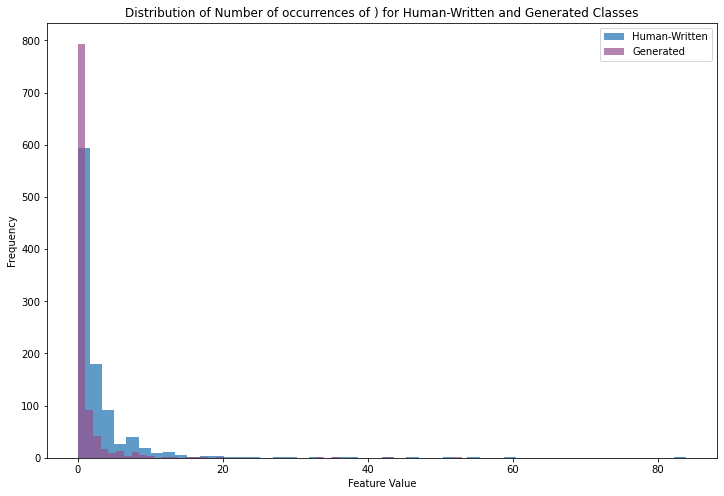

---Number of occurrences of ---- 3
Gen: mean: 4.504, STD: 7.991, (Min, Max): (0, 186)
Org: mean: 7.495, STD: 25.265, (Min, Max): (0, 651)


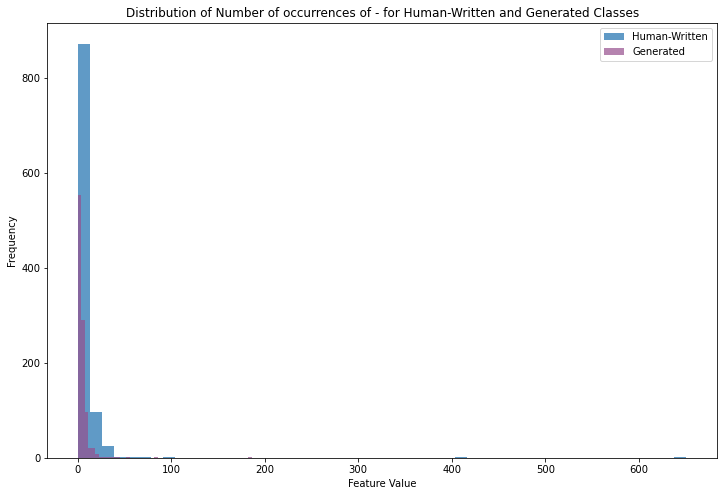

---Number of occurrences of ;--- 4
Gen: mean: 0.24, STD: 1.83, (Min, Max): (0, 50)
Org: mean: 0.582, STD: 1.875, (Min, Max): (0, 36)


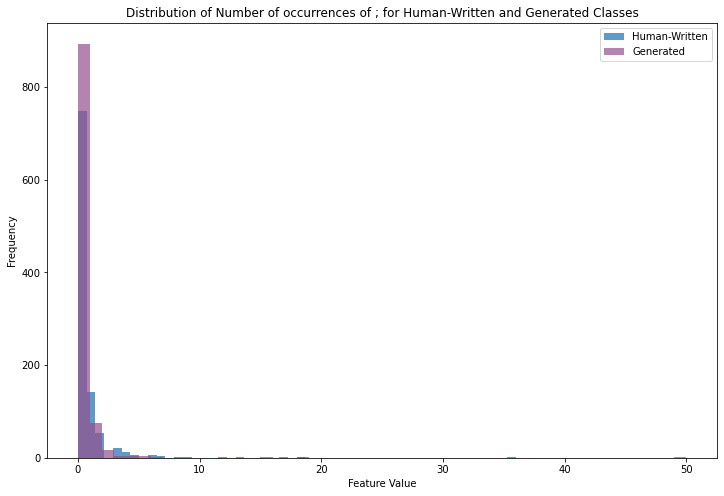

---Number of occurrences of ?--- 5
Gen: mean: 0.45, STD: 1.73, (Min, Max): (0, 31)
Org: mean: 1.638, STD: 3.135, (Min, Max): (0, 52)


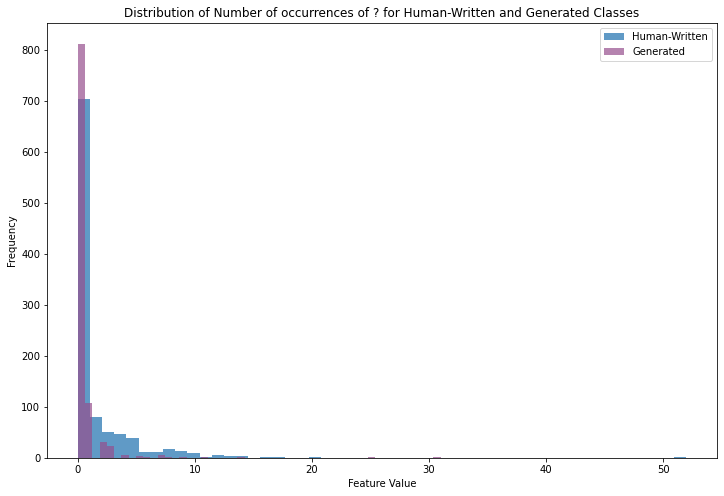

---Number of occurrences of '--- 6
Gen: mean: 4.166, STD: 4.616, (Min, Max): (0, 41)
Org: mean: 1.777, STD: 5.967, (Min, Max): (0, 124)


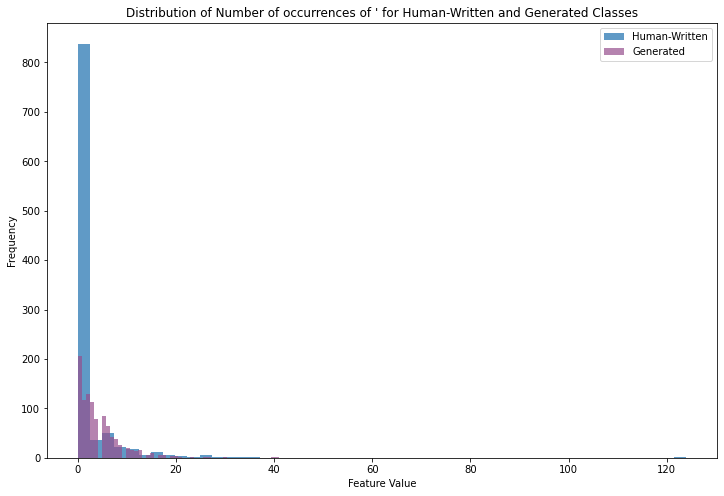

---Sentence STD--- 7
Gen: mean: 11.568, STD: 13.179, (Min, Max): (0.0, 188.5)
Org: mean: 15.456, STD: 20.413, (Min, Max): (0.0, 319.796)


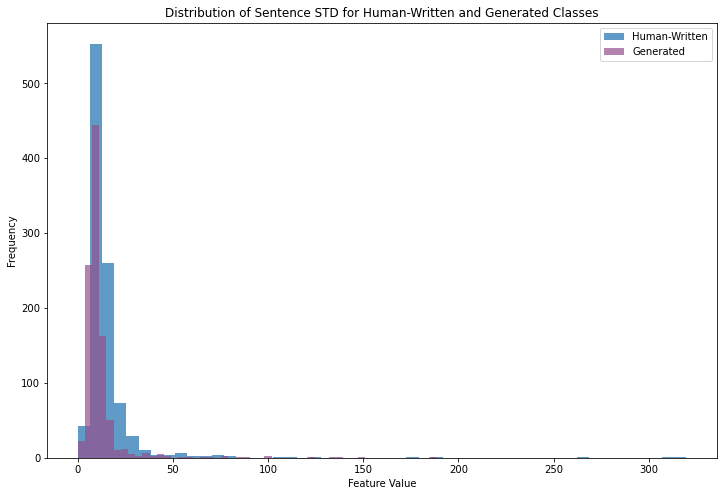

---Length difference for consecutive sentences--- 8
Gen: mean: 0.508, STD: 17.747, (Min, Max): (-75.5, 377.0)
Org: mean: -0.029, STD: 25.048, (Min, Max): (-621.0, 357.0)


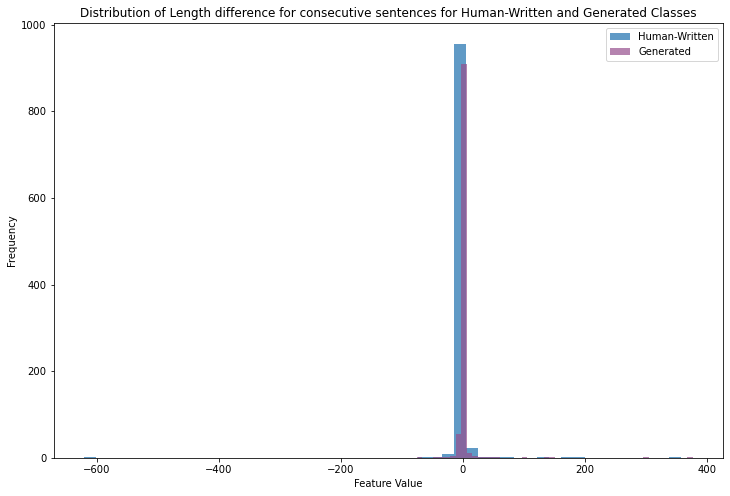

---Sentence with <11 words--- 9
Gen: mean: 2.458, STD: 5.046, (Min, Max): (0, 56)
Org: mean: 5.351, STD: 7.65, (Min, Max): (0, 95)


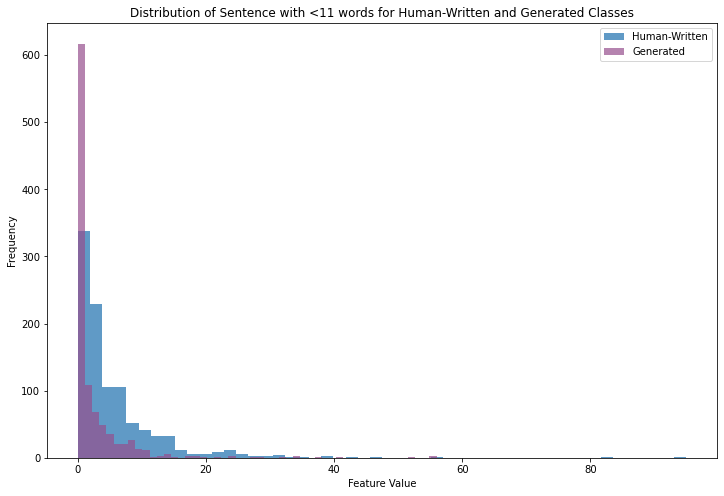

---Sentence with >34 words--- 10
Gen: mean: 2.339, STD: 2.088, (Min, Max): (0, 15)
Org: mean: 4.539, STD: 3.885, (Min, Max): (0, 21)


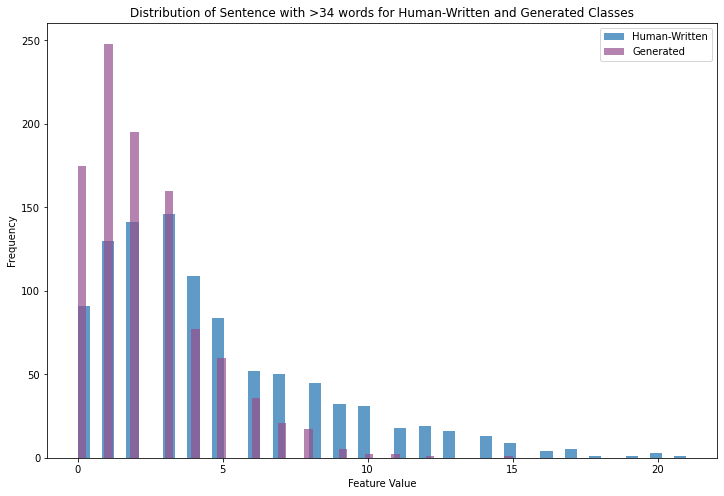

---Number of occurrences of although--- 11
Gen: mean: 0.029, STD: 0.174, (Min, Max): (0, 2)
Org: mean: 0.051, STD: 0.237, (Min, Max): (0, 2)


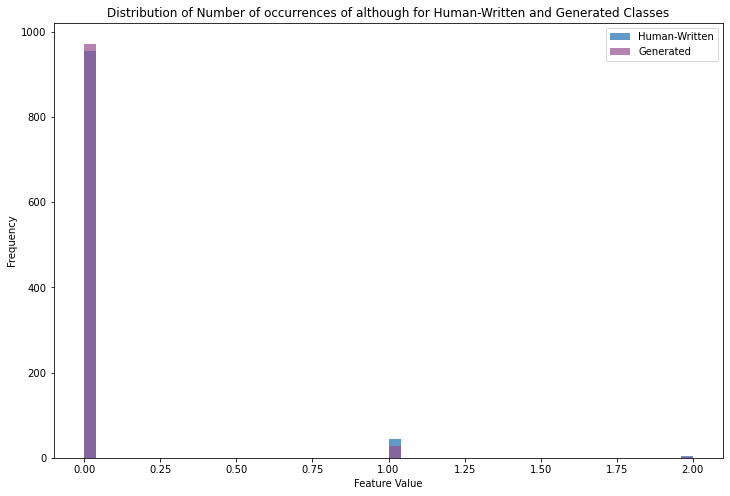

---Number of occurrences of However--- 12
Gen: mean: 0.352, STD: 0.69, (Min, Max): (0, 5)
Org: mean: 0.203, STD: 0.555, (Min, Max): (0, 5)


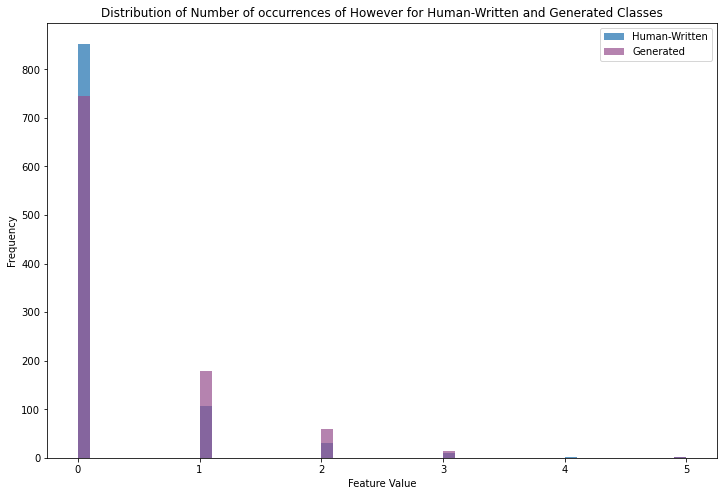

---Number of occurrences of but--- 13
Gen: mean: 0.976, STD: 1.494, (Min, Max): (0, 17)
Org: mean: 1.852, STD: 2.06, (Min, Max): (0, 14)


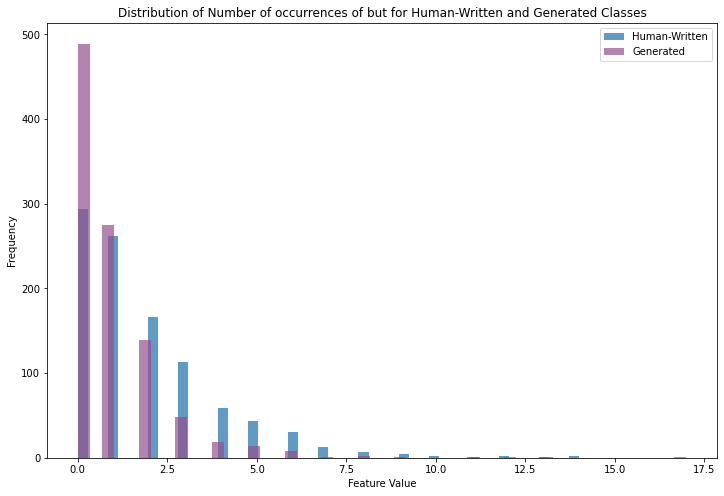

---Number of occurrences of because--- 14
Gen: mean: 0.238, STD: 1.234, (Min, Max): (0, 26)
Org: mean: 0.59, STD: 1.113, (Min, Max): (0, 9)


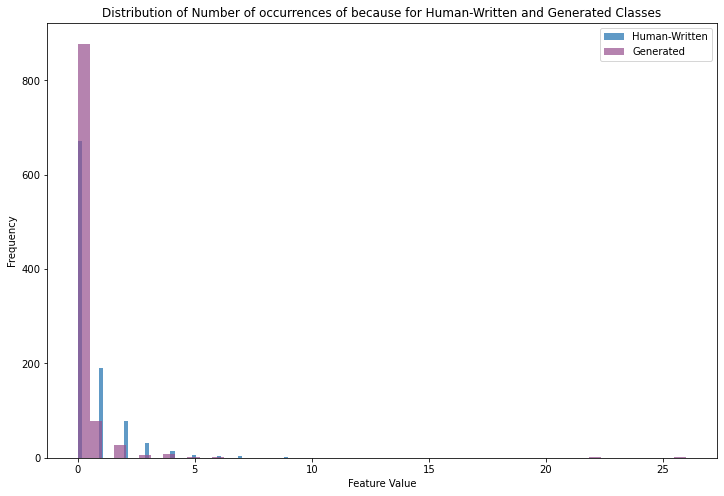

---Number of occurrences of this--- 15
Gen: mean: 1.313, STD: 2.04, (Min, Max): (0, 40)
Org: mean: 2.825, STD: 3.216, (Min, Max): (0, 22)


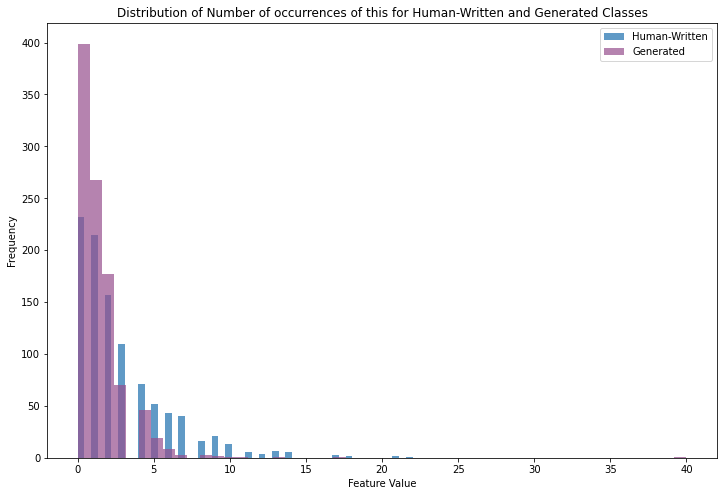

---Number of occurrences of others or researchers--- 16
Gen: mean: 0.186, STD: 0.652, (Min, Max): (0, 9)
Org: mean: 0.364, STD: 1.046, (Min, Max): (0, 11)


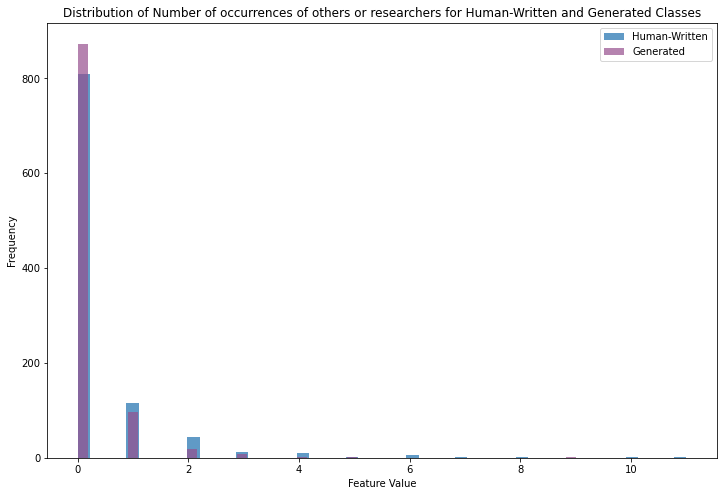

---Count of numbers in the document--- 17
Gen: mean: 7.372, STD: 13.432, (Min, Max): (0, 214)
Org: mean: 10.286, STD: 28.59, (Min, Max): (0, 610)


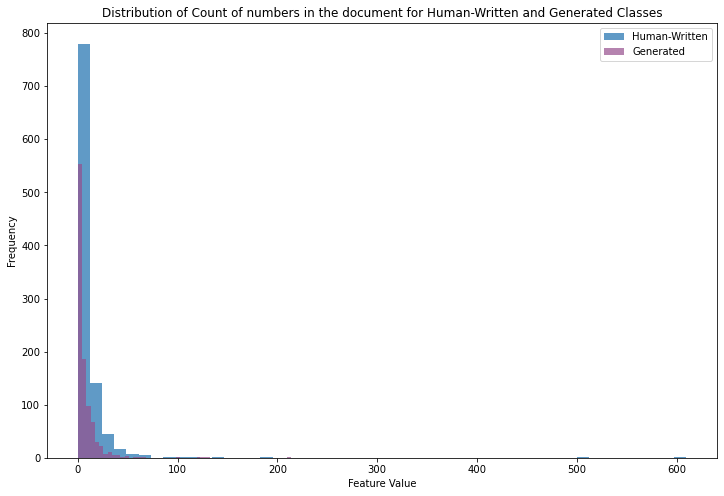

---Contains 2 times more capitals than periods--- 18
Gen: mean: 0.874, STD: 0.332, (Min, Max): (0, 1)
Org: mean: 0.81, STD: 0.392, (Min, Max): (0, 1)


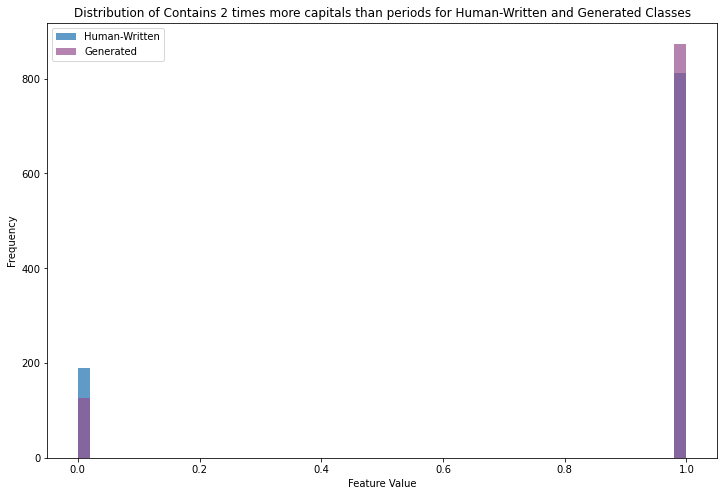

---Number of occurrences of et--- 19
Gen: mean: 5.178, STD: 4.752, (Min, Max): (0, 56)
Org: mean: 10.519, STD: 8.659, (Min, Max): (0, 59)


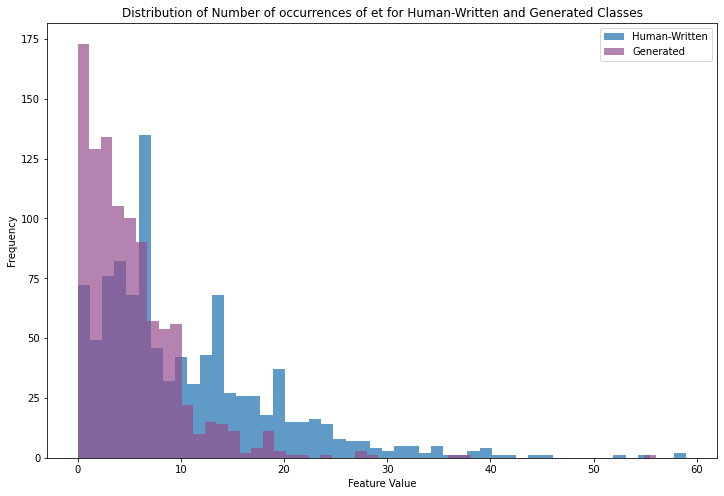

---Sentence Mean--- 20
Gen: mean: 26.829, STD: 24.428, (Min, Max): (3.948, 486.0)
Org: mean: 26.474, STD: 19.765, (Min, Max): (8.917, 352.667)


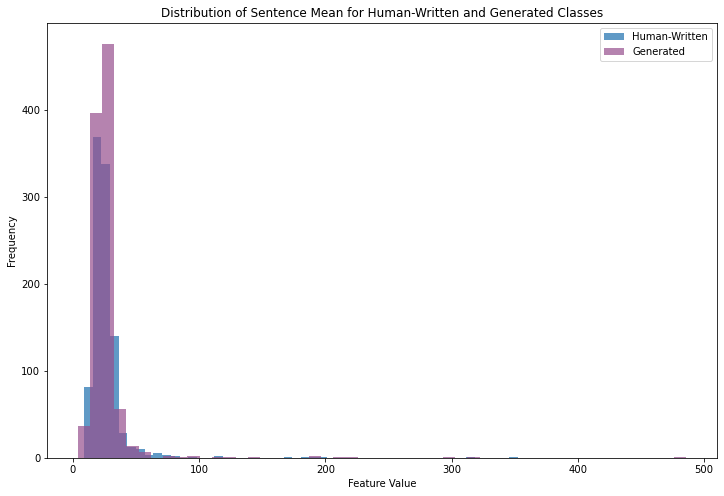

In [7]:
# Set Controls
num_bins = 50   # You can adjust this value as needed

for i in range(21):  # Assuming you want to iterate from 0 to 21 (inclusive)
    # Extract the specific feature you want to use for the bar chart
    feature_key = [list(doc.keys())[i] for doc in gen_features][0]  # Adjust this index based on the feature you want to use
    org_values = [doc[feature_key] for doc in org_features]
    gen_values = [doc[feature_key] for doc in gen_features]

    # Print rounded values
    print(f"---{feature_key}--- {i}")
    print(f"Gen: mean: {round(np.mean(gen_values), 3)}, STD: {round(np.std(gen_values), 3)}, (Min, Max): ({round(np.min(gen_values), 3)}, {round(np.max(gen_values), 3)})")
    print(f"Org: mean: {round(np.mean(org_values), 3)}, STD: {round(np.std(org_values), 3)}, (Min, Max): ({round(np.min(org_values), 3)}, {round(np.max(org_values), 3)})")

    # Set the size of the plot
    plt.figure(figsize=(12, 8))

    # Create a bar chart for both classes with controlled bins
    plt.hist(org_values, bins=num_bins, color='#1c70ae', alpha=0.7, label='Human-Written')
    plt.hist(gen_values, bins=num_bins, color='#964f8e', alpha=0.7, label='Generated')

    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature_key} for Human-Written and Generated Classes')
    plt.legend()
    plt.show()

    # Other Posable Changes 
    #max_x_value = max(np.mean(org_values) + 3 * np.std(org_values), np.mean(gen_values) + 3 * np.std(gen_values))
    #num_bins = len(np.unique(np.concatenate((org_values, gen_values))))
    #plt.xlim(left=0, right=max_x_value)

---Sentence with <11 words---
Gen: mean: 2.458, STD: 5.046, (Min, Max): (0, 56)
Org: mean: 5.351, STD: 7.65, (Min, Max): (0, 95)


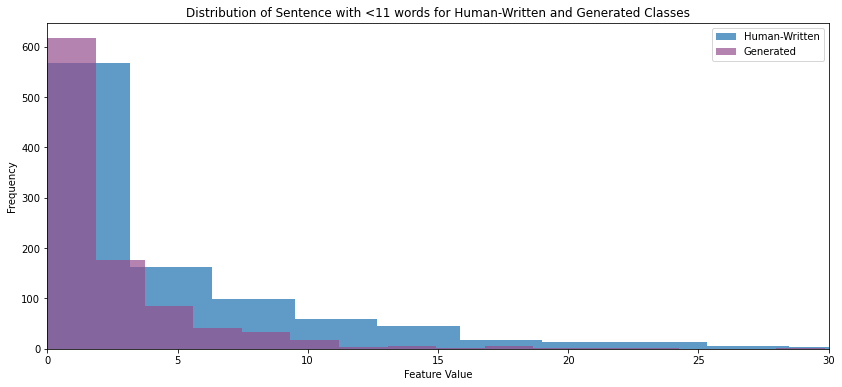

In [8]:
# Set Controls
num_bins = 30   # You can adjust this value as needed
i = 9
min_x_value = 0
max_x_value = 30

# Extract the specific feature you want to use for the bar chart
feature_key = [list(doc.keys())[i] for doc in gen_features][0]  # Adjust this index based on the feature you want to use
org_values = [doc[feature_key] for doc in org_features]
gen_values = [doc[feature_key] for doc in gen_features]

# Print rounded values
print(f"---{feature_key}---")
print(f"Gen: mean: {round(np.mean(gen_values), 3)}, STD: {round(np.std(gen_values), 3)}, (Min, Max): ({round(np.min(gen_values), 3)}, {round(np.max(gen_values), 3)})")
print(f"Org: mean: {round(np.mean(org_values), 3)}, STD: {round(np.std(org_values), 3)}, (Min, Max): ({round(np.min(org_values), 3)}, {round(np.max(org_values), 3)})")

# Set the size of the plot
plt.figure(figsize=(14, 6))

# Create a bar chart for both classes with controlled bins
plt.hist(org_values, bins=num_bins, color='#1c70ae', alpha=0.7, label='Human-Written')
plt.hist(gen_values, bins=num_bins, color='#964f8e', alpha=0.7, label='Generated')

plt.xlim(left=min_x_value, right=max_x_value)
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title(f'Distribution of {feature_key} for Human-Written and Generated Classes')
plt.legend()
plt.show()

# Other Possible Changes 
# BarMin = 0
# BarMax = 1
# max_x_value = max(np.mean(org_values) + 3 * np.std(org_values), np.mean(gen_values) + 3 * np.std(gen_values))
# num_bins = len(np.unique(np.concatenate((org_values, gen_values))))
# plt.xlim(left=0, right=max_x_value)


[5, 3, 9, 6]
Test String:
this sentacne has > 7 words. This has 4. But this one has more it has 10 words. and here is one with 7.


Features:
Sentences per paragraph: 4.00
Words per paragraph: 28.00
Number of occurrences of ): 0.00
Number of occurrences of -: 0.00
Number of occurrences of ;: 0.00
Number of occurrences of ?: 0.00
Number of occurrences of ': 0.00
Sentence STD: 2.17
Length difference for consecutive sentences: 0.33
Sentence with <11 words: 4.00
Sentence with >34 words: 0.00
Number of occurrences of although: 0.00
Number of occurrences of However: 0.00
Number of occurrences of but: 0.00
Number of occurrences of because: 0.00
Number of occurrences of this: 2.00
Number of occurrences of others or researchers: 0.00
Count of numbers in the document: 4.00
Contains 2 times more capitals than periods: 0.00
Number of occurrences of et: 0.00
Sentence Mean: 5.75




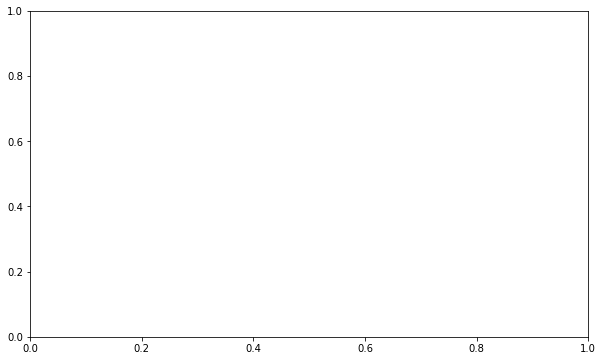

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import re
from nltk.tokenize import sent_tokenize, word_tokenize

# Your find_features_stats function here...

# Test string
TestString = "this sentacne has > 7 words. This has 4. But this one has more it has 10 words. and here is one with 7."

# Control parameters
control = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

# Extract features
features = find_features_stats(TestString, control)

# Print TestString
print("Test String:")
print(TestString)
print("\n")

# Print feature names and values
print("Features:")
for feature_name, feature_value in features.items():
    print(f"{feature_name}: {feature_value:.2f}")
print("\n")

# Extract feature names and values
feature_names = list(features.keys())
feature_values = list(features.values())
